<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker*

## Notebook 13: Regression analysis I

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In this Notebook, we learn how to fit a model to a set of data. In the first half of this Notebook, we fit several different models to the same data set, also called regression analysis. In the second half of this Notebook, we look under the hood of these regression analyses, we discuss how the best parameters are computed, how the goodness of fit can be quantified, and what these other parameters are that some of the regression functions return. 

### Root mean square error
One way to quantify the fit between data and a model is to compute the root mean square error. The error is defined as the difference between the observed value and the modeled value. Another term for the error is the residual. If the error of data point $i$ is written as $\varepsilon_i$, and the total number of observations is $N$, then the sum of squared errors $S$ is

$$E = \sum{\varepsilon_i^2}$$

When the total number of observations is $N$, the root mean square error $E$ is computed as

$$E_s=\sqrt{\frac{1}{N}S}=\sqrt{\frac{1}{N}\sum{\varepsilon_i^2}}$$

The root mean square error is an estimate of the goodness of fit and can be computed for any model and any dataset.

### Exercise 1. <a name="back1"></a>Fit a straight line
Load the $x,y$ values of 20 data points from the file `xydatafit.dat`. Fit a straight line through the data using the `linregress` function of `scipy.stats`. Note that the `linregress` function returns 3 other values beyond the slope and intercept (use `linregress?` to find out); more on these 3 additional values later on in this Notebook. Plot the data and the fitted straight line. Add a legend. Add the root mean square error as a title to the graph. Print the optimal values for the slope and intercept of the straight line to the screen.

<a href="#ex1answer">Answers to Exercise 1</a>

### Exercise 2. <a name="back2"></a>Fit a polynomial
Use the $x,y$ values of 20 data points from the file `xydatafit.dat`. Fit a second degree polynomial (a parabola) through the data using the `np.polyfit` function. Plot the data and the fitted parabola. Add a legend. Report the root mean squared error in the title. Did the root mean squared error improve?

<a href="#ex2answer">Answers to Exercise 2</a>

### Fitting an arbitrary function
Python functions to fit a straight line or polynomial are readily available. There are many other functions that you may want to use to fit to your data. The function `curve_fit` can be used to fit an arbitrary function that you define; `curve_fit` is part of the `scipy.optimize` package. The `curve_fit` function requires you to write a function that takes as its first argument the independent variable (in our case above that are the $x$-values) followed by the parameter(s) that you want to fit and returns the value of the function at all the $x$ values for the supplied parameters. For example, to fit a straight line, you need to write a function

In [2]:
def func(x, a, b):
    return a * x + b

The `curve_fit` function needs to be called with three arguments: the function that you want to fit, the values of the independent variable (in our case $x$), and the values of the depenedent variable (in our case $y$). The `curve_fit` funtion than returns an array with the optimal parameters (in a least squares sense) and a second array containing the covariance of the optimal parameters (more on that later). For example, for the case of Exercise 1:

In [3]:
from scipy.optimize import curve_fit
x, y = np.loadtxt('xydatafit.dat')  # in case these were modified in one of the exercises
popt, pcov = curve_fit(func, x, y)
print('optimal parameters:', popt)

optimal parameters: [ 6.07744372 42.58245717]


Note that these optimal parameters are identical to the values you computed in Exercise 1. 

### Exercise 3. <a name="back3"></a>Fit an exponential function with `curve_fit`
Use the $x,y$ values of 20 data points from the file `xydatafit.dat`. Fit the function $f(x) = A\exp(ax) + b$ through the data using the `curve_fit` function of `scipy.optimize`. Plot the data and the fitted function. Report the root mean squared error in the title. Did the root means squared error improve?

<a href="#ex3answer">Answers to Exercise 3</a>

### Least squares
In the exercises above, the *optimal* or *best* parameters were obtained with either the `linregress`, `polyfit` or `curve_fit` methods. But how do these methods do that? Or maybe a more fundamental question: 'What is *optimal*?' or 'What is *best*?' In this Notebook, we define *best* as the parameter set that minimizes the sum of the squared errors (so it also minimizes the root mean square error). Such an optimization approach is also referred to as a *least squares* approach. 

For example, consider the following three data points: 

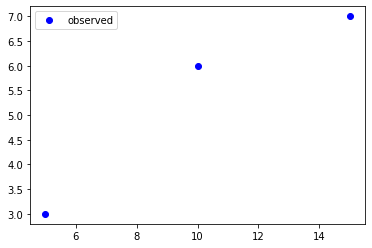

In [4]:
xdata = np.array([5.0, 10.0, 15.0])
ydata = np.array([3.0, 6.0, 7.0])
plt.plot(xdata, ydata, 'bo', label='observed')
plt.legend();

We can try to fit a straight line through these three points, but you can already see that the three points don't lie on a line, so there is no straight line that goes exactly through the three points. The straight line is written as $y=ax+b$, where $a$ is the slope of the line and $b$ is called the intercept (it is the value of $y$ for $x=0$). We write a function that takes as input arguments an array of observed $x$ values and an array of corresponding $y$ values, and values for the slope $a$ and intercept $b$. The function returns the sum of squared errors, where the error is defined as the difference betweeen the observed value of $y$ and the value of the straight line at that same $x$ value. The equation for the error at point $i$ is $\varepsilon_i$ and may be written as

$\varepsilon_i = y_i - (ax_i + b)$

In [5]:
def sse(a, b, x=xdata, y=ydata):
    error = y - (a * x + b)
    return np.sum(error ** 2)

As you can see, different values of $a$ and $b$ give different values for the sum of squared errors `sse`. The `sse` for $a=1$, $b=2$ is larger than for $a=1$, $b=1$. 

In [6]:
print('sse of a=1, b=2:', sse(a=1, b=2))
print('sse of a=1, b=1:', sse(a=1, b=1))

sse of a=1, b=2: 152.0
sse of a=1, b=1: 115.0


What we can do is compute the `sse` function for a larger number of $a$ and $b$ values. If we do that on a regular grid, we can create contours of the `sse` function. The `sse` function is constant along any contour. A contour map of the `sse` function is similar to an elevation map. The goal is now to find the combination of $a$ and $b$ that gives the smallest value of the sum of squared errors. In the graph below, you can see that the smallest value of `sse` is obtained at $a\approx 0.4$, $b\approx 1.3$ (you have to look closely for the darkest blue in the figure; the area beyond the yellow is $E>10$).

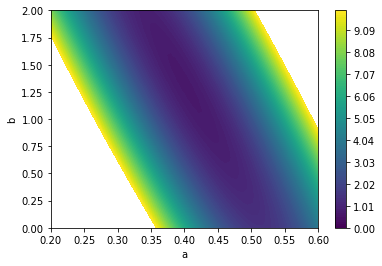

In [7]:
a, b = np.meshgrid(np.linspace(0.2, 0.6, 50), np.linspace(0, 2, 50))
ssevec = np.vectorize(sse)
z = ssevec(a, b)
plt.figure()
plt.contourf(a, b, z, np.linspace(0, 10, 100))
plt.colorbar()
plt.xlabel('a')
plt.ylabel('b');

How do we minimize the sum of squared errors? As usual, we find the minimum of a function by taking the derivative and setting it to zero. This is a little involved, but not too difficult. The sum of squared errors is written as $E$

$$
E=\sum_{i=1}^N\varepsilon_i^2=
\sum_{i=1}^N[y_i-(ax_i+b)]^2
$$

where $N$ is the number of observations. The slope $a$ and intercept $b$ are determined such that $E$ is minimized, which means that the following derivatives are zero

$$\frac{\partial E}{\partial a}=0 \qquad \frac{\partial E}{\partial b}=0$$

Differentiation gives (using the chain rule)

$$
\frac{\partial E}{\partial a}=\sum_{i=1}^N[2(y_i-ax_i-b)(-x_i)]=
2a\sum_{i=1}^Nx_i^2+2b\sum_{i=1}^Nx_i-2\sum_{i=1}^Nx_iy_i
$$

$$
\frac{\partial E}{\partial b}=\sum_{i=1}^N[2(y_i-ax_i-b)(-1)]=
2a\sum_{i=1}^Nx_i+2bN-2\sum_{i=1}^Ny_i
$$

Setting the derivatives equal to zero and division by 2 gives

$$
a\sum_{i=1}^Nx_i^2+b\sum_{i=1}^Nx_i-\sum_{i=1}^Nx_iy_i=0
$$

$$
a\sum_{i=1}^Nx_i+bN-\sum_{i=1}^Ny_i=0
$$

This system of two linear equations with two unknowns ($a$ and $b$) may be solved to give

$$ a=\frac{N\sum_{i=1}^Nx_iy_i-\sum_{i=1}^Nx_i\sum_{i=1}^Ny_i}
{N\sum_{i=1}^Nx_i^2-\sum_{i=1}^Nx_i\sum_{i=1}^Nx_i}
$$

$$
b=\bar{y}-a\bar{x}
$$
where $\bar{x}$ and $\bar{y}$ are the mean values of $x$ and $y$, respectively. 

### Exercise 4. <a name="back4"></a>Fitting a straight line revisited
Compute the optimal values (in the least squares sense) of $a$ and $b$ using the two equations derived above and the corresponding sum of squared errors (using the `xdata` and `ydata` arrays for the three points given above). Next, use the `linregress` function of the `scipy.stats` package to compute the optimal values and verify that the `linregress` function gives the same answers. Create a graph that shows the three data points and the fitted straight line.

<a href="#ex4answer">Answers to Exercise 4</a>

### The correlation coefficient, $p$-value and standard error. 
The `linregress` function returns 5 values. Besides the slope and intercept, these are somewhat cryptically defined as the correlation coefficient, the $p$-value, and the standard error. Each of these three values are a quantification of the goodness of fit. According to statisticians, these terms in the `scipy.stats` documentation are somewhat imprecisely defined (they will likely be updated in the future). This is what they mean:

The square of the correlation coefficient $r$ is the *r-squared value* and is defined as

$$r^2 = 1 - \sum{(y_i - \hat{y}_i)^2} \left/ \sum{(y_i - \bar{y})^2} \right. $$

where $y_i$ is the $y$ value of data point $i$, while $\hat{y}_i$ is the fitted values at data point $i$. It can also be written as 

$$r^2 = \frac{\text{var}(y) - \text{var}(y-\hat{y})}{\text{var}(y)}$$

So the $r^2$ value is the variance of $y$ minues the variance of the remaining residuals (the data values minus the fitted values), divided by the variance of $y$, and is also referred to as the 'percentage of variance explained'. If the model goes exactly through the data (a perfect fit), then the variance of the residuals is zero, and $r^2=1$. If the model doesn't do much better than simply the mean of $y$, then the  $r^2$ is very close zero. A value of $r^2$ close to 1 is generally a good thing, but it is not possible to say anything definitive about the goodness of fit by just reporting the $r^2$ value (although many people do).

The standard error returned by the `linregress` model is the estimated standard deviation of the fitted slope. The equation is

$$s = \sqrt{\frac{\sum(y_i-\hat{y}_i)^2}{N-2}} \left/ \sqrt{\sum{(x_i-\bar{x})^2}} \right.$$

The standard deviation of the slope should be interpreted similar to the standard deviation of the mean. The computed slope is a statistical value so it has an estimated standard deviation. 

The $p$-value is related to the question whether the estimated slope is significantly different from zero. When the slope is significantly different from zero, you can state that there is a linear relationship between the two variables. The $p$-value is related to the question whether the estimated slope is significantly different from zero when you perform a $t$-test. When the $p$-value is less than 0.05, this means that when you perform a two-sided $t$-test you can reject the null hypothesis that the slope is zero in favor of the alternative hypothesis that the slope is not zero. In layman terms: it means that there is less than 5% chance that the slope is zero and more than 95% chance that the slope is not zero. Or even simpler: the slope is significantly different from zero. 

### Exercise 5. <a name="back5"></a>Verification of goodness of fit parameters
Implement the equations for $r^2$ and $s$ given above to verify that the values returned by the `linregress` function are correct. Perform a two-sided hypothesis test with significance level 5% where the null hypothesis is that the slope of the fitted line is zero and the alternative hypothesis is that the slope is not zero. Draw the probability density function of a $t$-distribution with mean 0 and standard deviation equal to the computed value of $s$. Use $N-2$ as the number of degrees of freedom (You subtract the number of parameters from $N$ as you used up these two degrees of freedom). Draw red vertical lines indicating the 2.5% and 97.5% percentiles according to the $t$-distribution. Draw a heavy black vertical line at the position of the computed value of the slope. Decide whether you can reject the null hypothesis that the slope is zero in favor of the alternative hypothesis that the slope is not 0 and add that as a title to the figure.

<a href="#ex5answer">Answers to Exercise 5</a>

### Meaning of the $p$-value
If you did the previous exercise correctly, you found out that the slope was not significantly different from zero (you could not reject the null hypothesis that the slope is zero with significance level 5%). The $p$ value returned by the `linregress` function means that if you would have performed the hypothesis with significance level $p$, then you would not have rejected the hypothesis. Let's try it. First we recompute the $p$ and $s$ value of the fitted line

In [8]:
from scipy.stats import linregress
slope, intercept, r, p, s = linregress(xdata, ydata)
print('p value:', p, 's value:', s)

p value: 0.1789123750220667 s value: 0.11547005383792511


In [9]:
from scipy.stats import t
p1, p2 = t.ppf([p / 2, 1 - p / 2], 1, loc=0, scale=s)
print('upper and lower bound for significance level', p, 'is:', p1, p2)

upper and lower bound for significance level 0.1789123750220667 is: -0.4000000000044717 0.4000000000044717


Just to be complete, we can compute the $p$ value from the $t$ distribution as

In [10]:
print('p-value from t-distribution:', 2 * (1 - t.cdf(a, 1, loc=0, scale=s)))

p-value from t-distribution: [[0.33333333 0.322417   0.31213621 ... 0.12433906 0.12266646 0.12103772]
 [0.33333333 0.322417   0.31213621 ... 0.12433906 0.12266646 0.12103772]
 [0.33333333 0.322417   0.31213621 ... 0.12433906 0.12266646 0.12103772]
 ...
 [0.33333333 0.322417   0.31213621 ... 0.12433906 0.12266646 0.12103772]
 [0.33333333 0.322417   0.31213621 ... 0.12433906 0.12266646 0.12103772]
 [0.33333333 0.322417   0.31213621 ... 0.12433906 0.12266646 0.12103772]]


Recall that the $p$-value only makes sense if the residuals are independent and Normally distributed. For the problem we are looking at with 3 data points that is, of course, impossible to say. But when you have more data, you really need to check or, alternatively, use a method that doesn't require the Normality assumption. 

One last thing about the significance level. We state that the slope is signficantly different from zero when $p<0.05$. But that means that there is still a 5% chance that the slope is different from zero by chance. Let's try that in the following exercise

### Exercise 6. <a name="back6"></a>Getting a value of $p<0.05$ by chance
Perform the following experiment: Generate 100 $x$ values randomly from a uniform distribution between 0 and 10 using the `np.random.rand` function. Generate 100 $y$ values randomly from a uniform distribution between 0 and 10. Fit a straight line using `linregress`. Perform the experiment 1000 time and count the number of times that the $p$-value is smaller than 0.05. As you will see, you will get approximately 50 out of the 1000 experiments where a line is fitted with a $p$-value smaller than 0.05 just by chance (as there really is no correlation between the random $x$ and $y$ values).  

<a href="#ex6answer">Answers to Exercise 6</a>

### Answers to the exercises

<a name="ex1answer">Answers to Exercise 1</a>

slope, intercept: 6.077443700312609 42.58245735877516


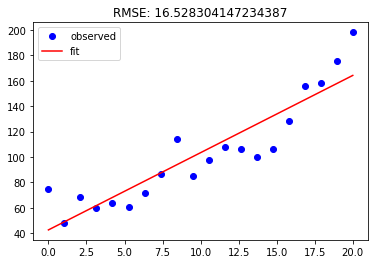

In [11]:
from scipy.stats import linregress
x, y = np.loadtxt('xydatafit.dat')
slope, intercept, r_value, p_value, std_err = linregress(x, y)
yfit = slope * x + intercept
plt.figure()
plt.plot(x, y, 'bo', label='observed')
plt.plot(x, yfit, 'r', label='fit')
rmse = np.sqrt(np.sum((yfit - y) ** 2) / len(y))
plt.title('RMSE: '+str(rmse))
plt.legend(loc='best')
print('slope, intercept:', slope, intercept)

<a href="#back1">Back to Exercise 1</a>

<a name="ex2answer">Answers to Exercise 2</a>

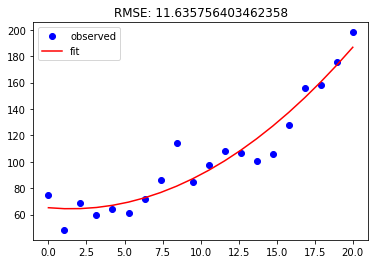

In [12]:
x, y = np.loadtxt('xydatafit.dat')
a, b, c = np.polyfit(x, y, 2)
yfit = a * x ** 2 + b * x + c
plt.figure()
plt.plot(x, y, 'bo', label='observed')
plt.plot(x, yfit, 'r', label='fit')
rmse = np.sqrt(np.sum((yfit - y) ** 2) / len(y))
plt.legend(loc='best')
plt.title('RMSE: '+str(rmse));

<a href="#back2">Back to Exercise 2</a>

<a name="ex3answer">Answers to Exercise 3</a>

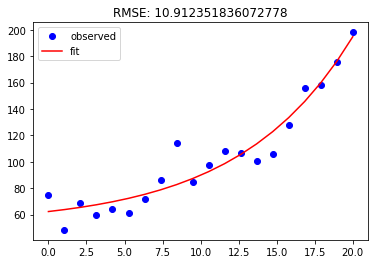

In [13]:
from scipy.optimize import curve_fit

def func(x, A, a, b):
    y = A * np.exp(a * x) + b
    return y

popt, pcov = curve_fit(func, x, y)
yfit = func(x, *popt)
plt.figure()
plt.plot(x, y, 'bo', label='observed')
plt.plot(x, yfit, 'r', label='fit')
plt.legend(loc='best')
rmse2 = np.sqrt(np.sum((yfit - y) ** 2) / len(y))
plt.title('RMSE: '+str(rmse2));

<a href="#back3">Back to Exercise 3</a>

<a name="ex4answer">Answers to Exercise 4</a>

In [14]:
def sse(a, b, x=xdata, y=ydata):
    error = y - (a * x + b)
    return np.sum(error ** 2)

In [15]:
xdata = np.array([5.0, 10.0, 15.0])
ydata = np.array([3.0, 6.0, 7.0])
N = len(xdata)
a = (N * np.sum(xdata * ydata) - np.sum(xdata) * np.sum(ydata) ) / \
    (N * np.sum(xdata ** 2) - np.sum(xdata) * np.sum(xdata))
b = np.mean(ydata) - a * np.mean(xdata)
print('optimal values of a and b:', a, b)
print('sse:', sse(a, b))

optimal values of a and b: 0.4 1.333333333333333
sse: 0.6666666666666667


In [16]:
from scipy.stats import linregress
slope, intercept, r, p, s = linregress(xdata, ydata)
print('slope and intercept according to linregress:', slope, intercept)

slope and intercept according to linregress: 0.4 1.333333333333333


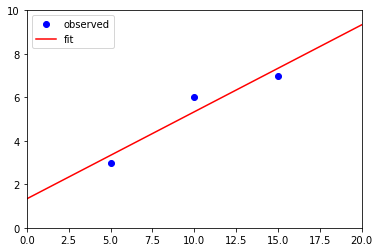

In [17]:
plt.plot(xdata, ydata, 'bo', label='observed')
plt.xlim(0, 20)
plt.ylim(0, 10)
x = np.linspace(0, 20, 2)
yfit = a * x + b
plt.plot(x, yfit, 'r', label='fit')
plt.legend(loc='best');

<a href="#back4">Back to Exercise 4</a>

<a name="ex5answer">Answers to Exercise 5</a>

In [18]:
yfit = a * xdata + b
print('r squared according to formula:', end=' ')
print(1 - sum((ydata - yfit) ** 2) / sum((ydata - np.mean(ydata)) ** 2))
print('r squared according to linregress:', r**2)

r squared according to formula: 0.923076923076923
r squared according to linregress: 0.9230769230769231


In [19]:
print('std of slope according to formula:', end=' ')
print(np.sqrt(np.sum((ydata - yfit)**2) / (N - 2)) / np.sqrt(np.sum((xdata - np.mean(xdata)) ** 2)))
print('std of slope according to linregress:', s)

std of slope according to formula: 0.11547005383792515
std of slope according to linregress: 0.11547005383792511


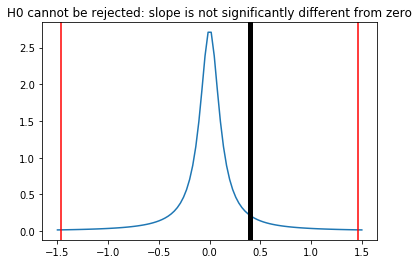

In [20]:
from scipy.stats import t
x = np.linspace(-1.5, 1.5, 100)
y = t.pdf(x, 1, loc=0, scale=s)
plt.figure()
plt.plot(x, y)
p025, p975 = t.ppf([0.025, 0.975], 1, loc=0, scale=s)
plt.axvline(p025, color='r')
plt.axvline(p975, color='r')
plt.axvline(a, color='k', lw=5)
plt.title('H0 cannot be rejected: slope is not significantly different from zero');

<a href="#back5">Back to Exercise 5</a>

<a name="ex6answer">Answers to Exercise 6</a>

In [21]:
count = 0
for i in range(1000):
    x = np.random.rand(100)
    y = np.random.rand(100)
    slope, intercept, r, p, s = linregress(x, y)
    if p < 0.05:
        count += 1
print('number of 1000 experiments where p < 0.05:', count)

number of 1000 experiments where p < 0.05: 52


<a href="#back6">Back to Exercise 6</a>